# Feature spaces, Linear Algebra, Numeric data methods, Linear Regression
#### Part 1
1. Feature space from csv file. Read `data/ds_salaries.csv` into a pandas dataframe
2. Prune the dataset to only have columns: "work_year", "experience_level", "salary_in_usd", "job_title", "company_location", "company_size".
3. Onehot encode "experience_level". Hint: look up pandas: `get_dummies()` method.
4. labelencode "company_location"
5. Normalize the company_location number (relative value between 0-1) ![](https://cdn-images-1.medium.com/max/253/1*Dl3P3Rrzto258X0Ales9Xw.png)
6. Make binning of the salary column (both cut and qcut methods).
7. Make a barplot with binned salaries to show the company size count for each of the bins. Like this:

<img src="images/binned_salaries.jpg" width=300/>

Hint: Use pandas Series unstack() method to get a dataframe from a multiindex Series object (The result of making a groupby count on both salary_bins and company_size columns

#### Part 2
8. Make it into a function that can take either company_size or experience_level as arguments.
9. Change the experience_level column to be numeric using this dictionary: `experience = {'EN':10,'EX':20,'MI':30,'SE':40}`. Hint: [Here](https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/).
10. Use seaborn pairplot to see if there is an approximately linear relationship between experience_level and salary
11. scatter Plot the 2d feature space of 'experience_level' and 'salary_in_usd
12. Use sklearn to find the best possible linear relationship between experience_level and salary_in_usd using linear regression.

## Part 3: Linear Algebra
Given the below dictionarys find out where each of the 4 people find the cheapest shopping according to their needs.
```python
shoppers = {
'Paula':{'Is':4,'Juice':2,'Kakao':3,'Lagkager':2},
'Peter':{'Is':2,'Juice':5,'Kakao':0, 'Lagkager':4},
'Pandora':{'Is':5,'Juice':3, 'Kakao':4, 'Lagkager':5},
'Pietro':{'Is':1,'Juice':8, 'Kakao':9, 'Lagkager':1}
}
shop_prices = {
    'Netto': {'Is':10.50,'Juice':2.25,'Kakao':4.50,'Lagkager':33.50},
    'Fakta': {'Is':4.00,'Juice':4.50,'Kakao':6.25,'Lagkager':20.00}
}
```
Hint: you can use pandas and Transpose to create dataframe: `pd.DataFrame(shoppers).T` to get the necessary shape of the dataframe/matrix. Also use df.to_numpy() to changes a Pandas DataFrame df into a numpy ndarray with only the numeric data

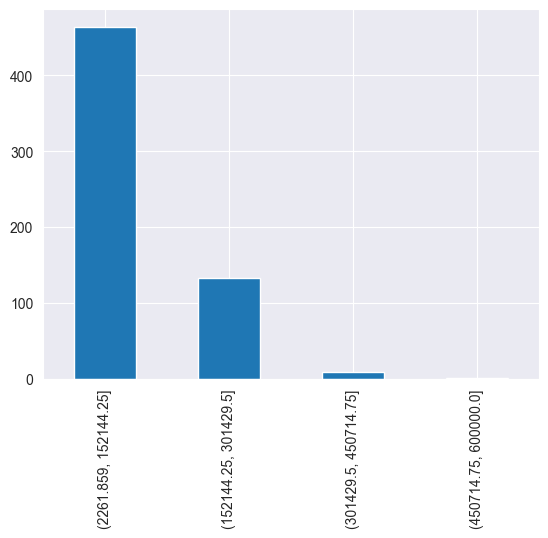

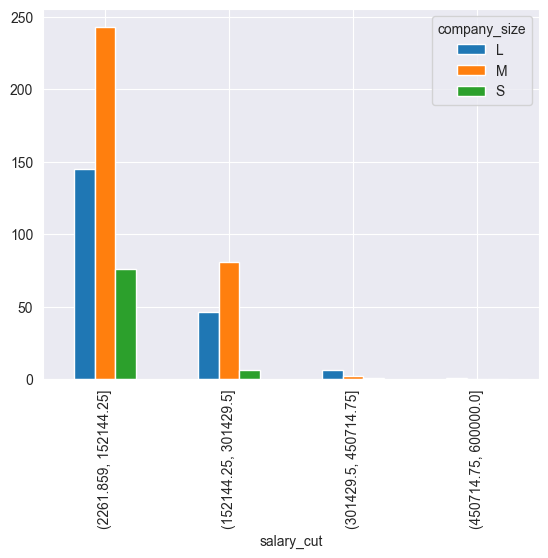

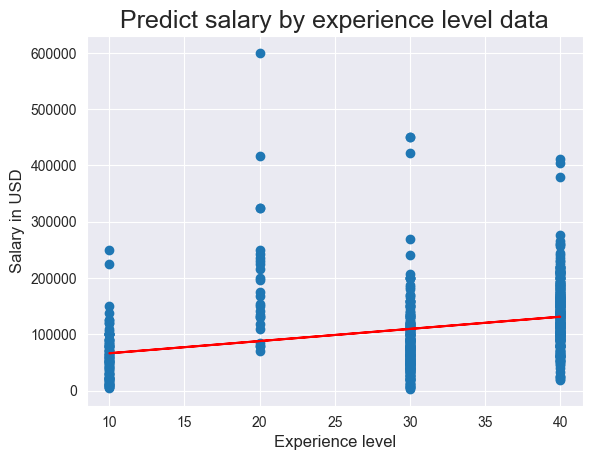

In [9]:
import numpy as np
#### Part 1
# 1. Feature space from csv file. Read `data/ds_salaries.csv` into a pandas dataframe
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sb

file = 'ds_salaries.csv'
df = pd.read_csv('ds_salaries.csv')
df.head()

# 2. Prune the dataset to only have columns: "work_year", "experience_level", "salary_in_usd", "job_title", "company_location", "company_size".
data = df[['work_year', 'experience_level','salary_in_usd','job_title','company_location', 'company_size']].copy()
data.head()

# 3. Onehot encode "experience_level". Hint: look up pandas: `get_dummies()` method.
pd.get_dummies(data, 'experience_level') # onehot converts category data into 0 or 1 (multiple columns are added to separate the categories)

# 4. labelencode "company_location"
# labelencode will turn labels into a numeric form to convert them into the machine-readable form
label_encoder = preprocessing.LabelEncoder()
data['company_location'] = label_encoder.fit_transform(data['company_location'])
data

# 5. Normalize the company_location number (relative value between 0-1) ![](https://cdn-images-1.medium.com/max/253/1*Dl3P3Rrzto258X0Ales9Xw.png)
df = data['company_location'].values.reshape(-1,1)
data['company_location'] = preprocessing.normalize(df, axis=0)
data

# 6. Make binning of the salary column (both cut and qcut methods).
data['salary_cut'] = pd.cut(data['salary_in_usd'], bins=4)
data['salary_cut'].value_counts()
data

data['salary_quantile'] = pd.qcut(data['salary_in_usd'], q=4)
data

# 7. Make a barplot with binned salaries to show the company size count for each of the bins. Like this:
data['salary_cut'].value_counts().plot(kind='bar')
data.groupby(['salary_cut','company_size']).size().unstack().plot(kind='bar',stacked=False)
plt.show()

#### Part 2
# 8. Make it into a function that can take either company_size or experience_level as arguments.
def make_bar_plot():
    data['salary_cut'].value_counts().plot(kind='bar')
    data.groupby(['salary_cut','company_size']).size().unstack().plot(kind='bar',stacked=False)
    plt.show()

# 9. Change the experience_level column to be numeric using this dictionary: `experience = {'EN':10,'EX':20,'MI':30,'SE':40}`. Hint: [Here](https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/).
experience = {'EN':10,'EX':20,'MI':30,'SE':40}
new_data = data.replace({"experience_level": experience})
new_data

# 10. Use seaborn pairplot to see if there is an approximately linear relationship between experience_level and salary
new_data = new_data[['experience_level', 'salary_in_usd']]
# sb.pairplot(new_data)

# 11. scatter Plot the 2d feature space of 'experience_level' and 'salary_in_usd
x = new_data[['experience_level']]
y = new_data[['salary_in_usd']]
# plt.scatter(x, y)

# 12. Use sklearn to find the best possible linear relationship between experience_level and salary_in_usd using linear regression.
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y) # finds the best fit of the linear plot line
predicted_y = model.predict(x) # gets an array of the y values based on the fit

plt.scatter(x, y)
plt.plot(x, predicted_y, color = 'red')
plt.xlabel('Experience level', fontsize=12)
plt.ylabel('Salary in USD', fontsize=12)
plt.title('Predict salary by experience level data', fontsize=18)
plt.show()

In [13]:
import pandas as pd
from sklearn import preprocessing

## Part 3: Linear Algebra
# Given the below dictionarys find out where each of the 4 people find the cheapest shopping according to their needs.

shoppers = {
'Paula':{'Is':4,'Juice':2,'Kakao':3,'Lagkager':2},
'Peter':{'Is':2,'Juice':5,'Kakao':0, 'Lagkager':4},
'Pandora':{'Is':5,'Juice':3, 'Kakao':4, 'Lagkager':5},
'Pietro':{'Is':1,'Juice':8, 'Kakao':9, 'Lagkager':1}
}
shop_prices = {
    'Netto': {'Is':10.50,'Juice':2.25,'Kakao':4.50,'Lagkager':33.50},
    'Fakta': {'Is':4.00,'Juice':4.50,'Kakao':6.25,'Lagkager':20.00}
}

P = pd.DataFrame(shoppers).T
Q = pd.DataFrame(shop_prices)

R = P.dot(Q)

print(P)
print("\n")
print(Q)
print("\n")
print(R)


         Is  Juice  Kakao  Lagkager
Paula     4      2      3         2
Peter     2      5      0         4
Pandora   5      3      4         5
Pietro    1      8      9         1


          Netto  Fakta
Is        10.50   4.00
Juice      2.25   4.50
Kakao      4.50   6.25
Lagkager  33.50  20.00


          Netto   Fakta
Paula    127.00   83.75
Peter    166.25  110.50
Pandora  244.75  158.50
Pietro   102.50  116.25
